<a href="https://colab.research.google.com/github/yunisroni/DSProjectMikroskil/blob/main/TB_DS_HeartDiseaseDT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Besar - Ilmu Data (ILK7104)**

Dataset: Heart Disease

Kelompok:
1. Roni Yunis - 248123006
2. Siti Aisyah - 248123017

# **1. Import Library**

Meng-install library dan mengimport library yang dibutuhkan untuk *Load Dataset* dan *Exploration Data Analysis (EDA)*

In [32]:
# a. Install ucimlpo package
!pip install ucimlrepo

In [33]:
# b. Import library untuk EDA dan Visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Load Dataset**

Mengambil dataset **Heart Disease** (id = 45) dari UCI Repository dan simpan ke dalam dataframe

In [34]:
# a. Import dataset dari ucimlrepo
from ucimlrepo import fetch_ucirepo

# b. fetch dataset atau mengambil dataset
heart_disease = fetch_ucirepo(id=45)

# c. data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# d. Informasi variabel
print(heart_disease.variables)

        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

In [35]:
# e. Gabung X dan y dalam satu dataframe
df = pd.concat([X, y], axis=1)


# **3. Memahami Struktur Dataset**

Beberapa tahapan yang dilakukan: memeriksa dataset, menampilkan deskripsi dataset, melihat type dataset.

In [36]:
# a. Periksa dataset untuk 5 baris terakhir
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [37]:
# b. Periksa dataset untuk 5 baris terbawah
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [38]:
# d. Cek type data dataset
df.info()

print()
print(f'Dataset Heart Disease:')
print(f'Jumlah baris: {df.shape[0]}')
print(f'Jumlah kolom/fitur: {df.shape[1]}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB

Dataset Heart Disease:
Jumlah baris: 303
Jumlah kolom/fitur: 14


# **4. Analisis Missing Value**

Tahapan yang akan dilakukan meliputi: memeriksa data yang *missing value* dan menangani data *missing value* sesuai dengan karakteristik dan kebutuhan data dalam analisis

In [39]:
# a. Memeriksa missing value
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Dari hasil tersebut dapat dijelaskan bahwa ada 2 kolom/variabel/fitur yang memiliki missing value, yaitu kolom `ca` dan `thal`.

`ca`: 4 missing value

`thal`: 2 missing value

1. Kolom `ca`: berisi nilai **numerik** yang menunjukkan jumlah pembuluh darah
besar yang diwarnai (nilai dari 0 hingga 3). Data ini sangat penting dalam diagnosis penyakit jantung.
2. Kolom `thal`: berisi nilai **kategori** yang menunjukkan jenis thalassemia (contoh:
normal, fixed defect, reversible defect). Data ini juga sangat penting dalam diagnosis penyakit jantung.

Jenis `thal`:

*Thalassemia* adalah kelainan darah yang dapat mempengaruhi kemampuan darah untuk membawa oksigen ke seluruh tubuh.

1. *Normal*: Menunjukkan tidak adanya kelainan thalassemia.

2. *Fixed Defect*: Menunjukkan adanya bagian jantung yang mengalami kerusakan permanen (tidak bisa dipulihkan).

3. *Reversible Defect*: Menunjukkan adanya bagian jantung yang mengalami kerusakan yang dapat pulih atau diperbaiki.



Untuk menangai missing value pada kolom `ca` akan menggunakan imputasi Median, karena kolom `ca` adalah variabel numerik yang bisa memiliki distribusi yang tidak simetris dan dapat menghindari pengaruh outlier yang bisa ada dalam distribusi data.

Untuk menagani missing value pada kolom `thal` akan menggunakan imputasi Mode, karena kolom `thal` adalah variabel kategorikal, sehingga dapat mempertahan distribusi kategori dalam data

In [40]:
# Missing value variabel ca
df['ca'].fillna(df['ca'].median(), inplace=True)

# Missing value variabel thal
df['thal'].fillna(df['thal'].mode()[0], inplace=True)

In [41]:
# Periksa kembali missing value dalam data
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Data pada kolom `ca` dan `thal` sudah ada lagi yang missing value

# **5. Analisis Univariate**

Tahapan yang akan dilakukan meliputi: analisis statistik deskriptif, melihat distribusi, melihat distribusi frekuensi untuk data kategorikal, dan pendeteksian outlier data,

**a. Analisis Deskriptif**

Mendeskripsi data secara statistik deskriptif yang meliputi: nilai mean, standar deviasi, min, max, dll

In [42]:
# Analisis statitik deskriptif

df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


Deskripsi data:

1. age: usia
2. sex: 0 = Perempuan, 1 = Laki-laki
3. cp: Chest pain type (Jenis nyeri dada)
    0 = Typical angina
    1 = Atypical angina
    2 = Non-angina pain
    3 = Asymptomatic
4. trestbps: Resting blood pressure (Tekanan darah istirahat) (mmHg)
5. chol: Serum cholestoral (Kolestrol serum) (mg/dl)
6. fbs: Fasting blood sugar (Gula darah puasa) (mg/dl)
7. resteg: Resting elecrocardiographic result (Hasil elekrokardiografi istirahat)
8. thalach: Maximum heart rate achieved (Denyut jantung maksimum) (bpm)
9. exang: Exercise induced angina (Angina yang diinduksi dengan olah raga) (Angina: jenis nyeri dada yang diakibatkan oleh berkurangnya aliran darah ke jantung)
10. oldpeak: ST depression induced by exercise relative to rest (Depresi ST yang disebabkan olah raga relatif terhadap  istirahat). (ST = Segmen ST atau segmen spesifik pada rekaman EKG)
11. slope: The slope of the peak exercise ST segment (Kemiringan segmen ST)
12. ca: number of major vessels (0-3) colored by flourosopy (Jumlah pembuluh darah utama (0-3))
13. thal: Skintigrafi talium (jenis thalassemia)
    3 = normal
    6 = fixed defect
    7 = Reversable defect
14. num: Heart Disease (diagnosa penyakit jantung)

**b. Distribusi Data Numeric**

Melakukan analisis distribusi untuk mendapatkan gambaran tentang bentuk distribusi dari data dan mengidentifikasi outlier yang mungkin ada.

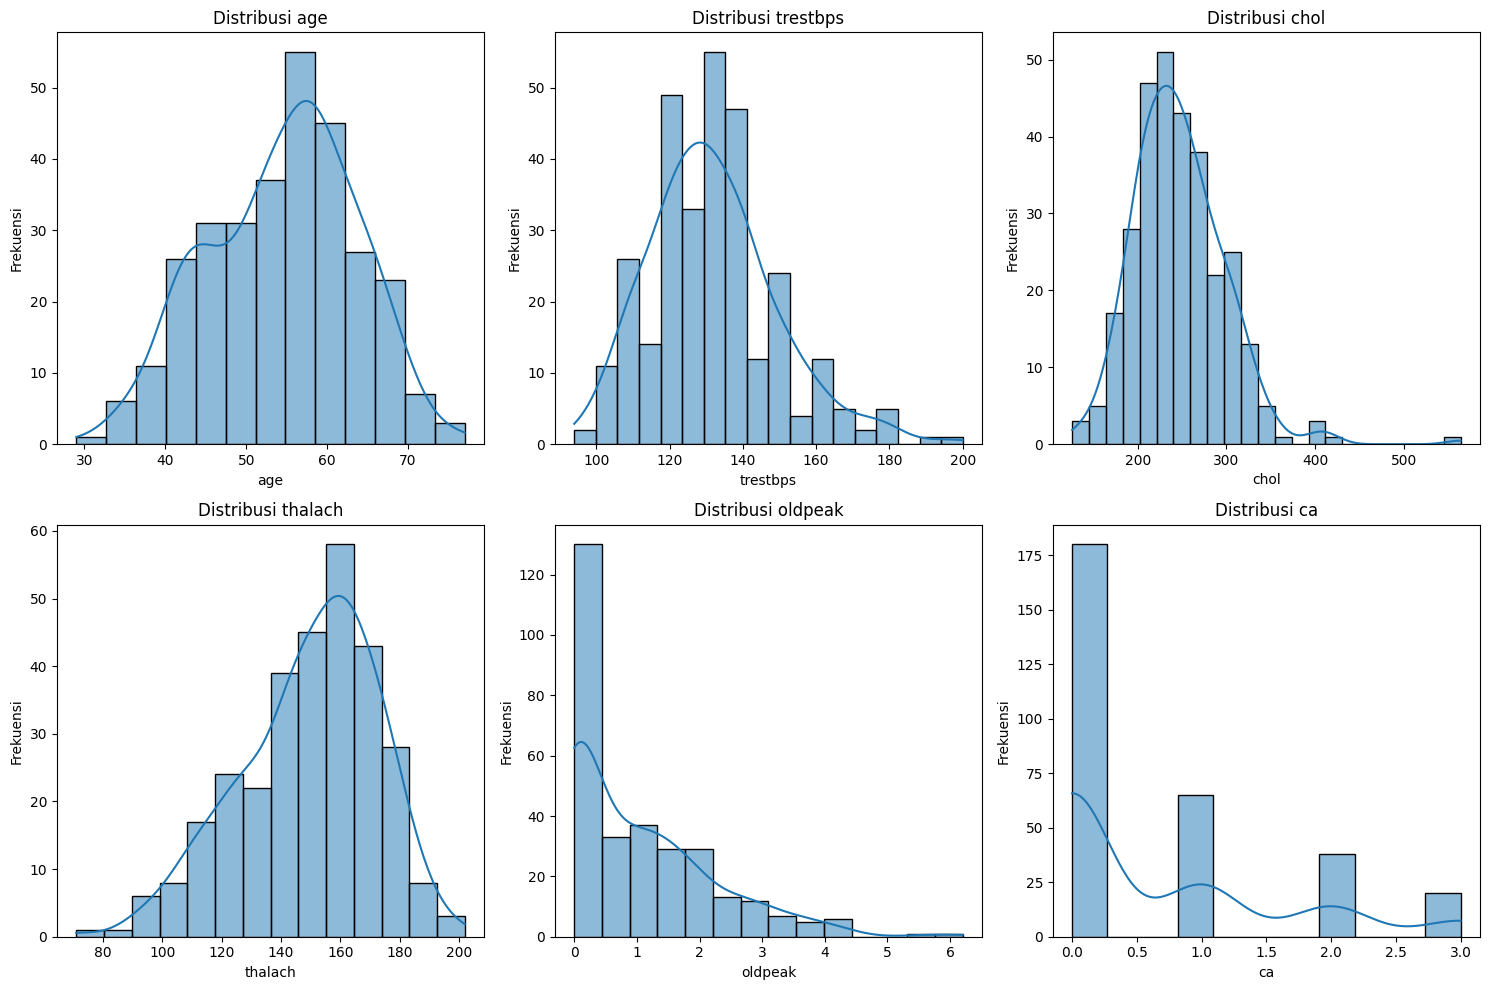

In [43]:
# Analisis distribusi data numeric

# Menatapkan fitur numerik
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

# Membuat gambar dan sumbu untuk subplot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Meratakan sumbu x untuk visualisasi
axes = axes.flatten()

# Melakukan perulangan dan buat histogram utk setiap fitur
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribusi {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frekuensi')

# Menampilkan plot
plt.tight_layout()
plt.show()


Keterangan dan penjelasan dari hasil visualisasi distribusi data:
1. `age` (Umur), distribusi data `age` mendekati distribusi normal dengan umur tertinggi sekitar 55 tahun. Sebagian besar data terkonsentrasi pada umur 40 hingga 65 tahun, dan sangat sedikit yang berumur di luar rentang tsb. Sehingga dapat disimpulkan bahwa sebagian besar pasien dalam dataset berada pada umur pertengahan hingga akhir paruh baya, dan merupakan kelompok umur yang lebih rentan terhadap penyakit jantung.

2. `trestbps` (Tekanan darah istirahat), distribusi data `trestbps` mendekati normal, dengan tekanan darah tertinggi 130 mmHg, dan ada beberapa data yang menunjukkan tekanan darah yang lebih tinggi di atas 140 mmHg. Sehingga dapat disimpulkan bahwa mayoritas pasien memiliki tekanan darah istirahat di kisaran 120-140 mmHg dan masih termasuk batas normal. Ada sejumlah kecil pasien dengan hypertensi (tekanan darah di atas 140 mmHg)

3. `chol` (kolesterol), ditribusi data `chol` menunjukkan distribusi yang sedikit miring ke kanan, dengan sebagian besar nilai berada di sekitar 200-200 mg/dL. Ada beberapa outliers dengan nilai kolesterol yang sangat tinggi di atas 400 mg/dL. Sehingga dapat disimpulkan bahwa sebagian besar pasien memiliki kolesterol yang berada dalam kisaran tinggi hingga sangat tinggi (lebih dari 200 mg/dL). Kolesterol tinggi adalah faktor risiko signifikan untuk penyakit jantung

4. `thalach` (Detak jantung maksimum), distribusi data `thalach` mendekati distibusi normal dengan puncak di sekitar 150 bpm. Sehingga bisa disimpulkan bhawa kebanyakan pasien mencapai detak jantung maksimum yang berada dalam kisaran normal. Rentang distribusi berkisar dari 100-200 bpm. Hal ini berkaitan an dengan menilai respons terhadap stres atau latihan fisik yang diberikan

5. `oldpeak` (Depresi ST), distribusi `oldpeak` sangat miring ke kanan, dengan sebagian besar nilai dekat 0 dan beberapa nilai yang lebih tinggi. Sehingga dapat disimpulkan bahwa mayoritas pasien memiliki depresi ST rendah atau tidak ada, tetapi ada beberapa denga nilai tinggi yang mungkin dapat diidentifikasi memiliki masalah jantung.

6. `ca` (Jumlah pembuluh darah besar yang diwarnai), distribusi `ca` menunjukkan pola yng sangat terpisah, dengan banyak pasien yang memiliki nilai 0 atau tidak ada pembuluh darah yang diwarnai. Sehingga dapat disimpulkan sebagian besar pasien tidak memiliki penyumbatan pembuluh darah, tetapi ada sejumlah pasien yang memiliki 1 hingga 3 pembuluh darah yang diwarnai, yang menunjukkan penyempitan atau penyumbatan yang signifikan

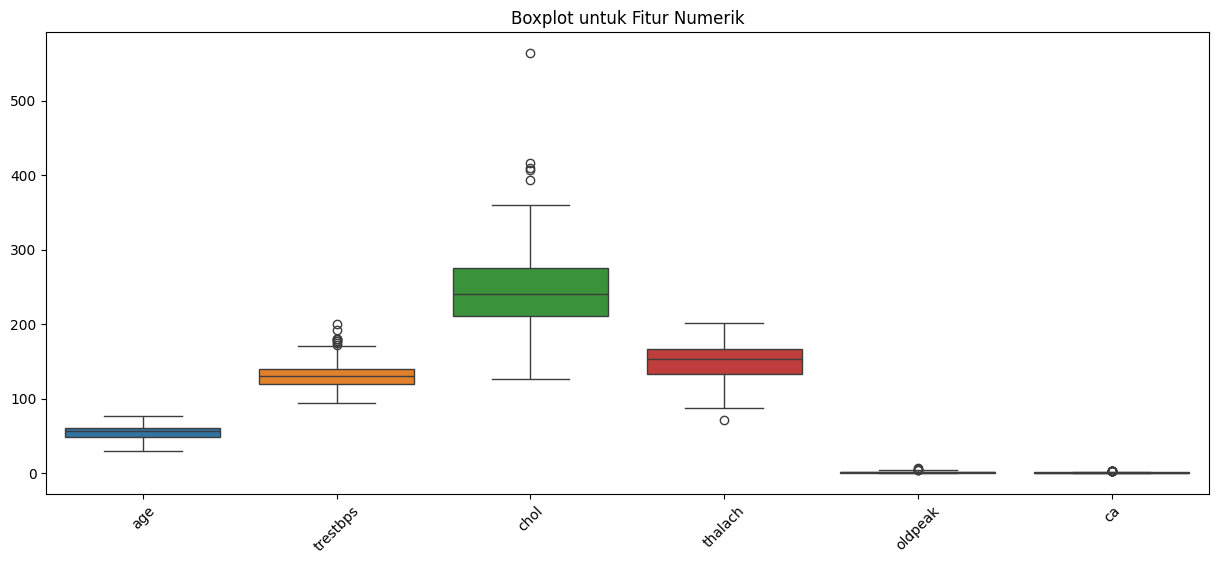

In [44]:
# Menampilkan IQR, median dan outliers dari data

# Membuat boxplot untuk fitur numerik
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[numerical_features])
plt.title('Boxplot untuk Fitur Numerik')
plt.xticks(rotation=45)
plt.show()


Berdasarkan hasil visualisasi boxplot diatas dapat dijelaskan bahwa:
1. Beberapa fitur seperti `trestbps`, `chol`, dan `thalack` menunjukkan adanya outliers yang signifikan, yang dapat diperkirakan adanya kasus ekstrem atau pasien dengan risiko tinggi

2. Secara umum kebanyakan fitur menunjukkan distribusi yang wajar dengan sebagian besar data berada dalam rentang yang diharapkan

3. Beberapa fitur seperti `chol` dan `testbps` dengan nilai-nilainya berada di ujung yang ekstrem dari distribusi menunjukkan adanya risiko tinggi terhadap penyakit jantung.

In [45]:
# Menghitung Z-Score untuk mengindetifikasi outlier yang lebih detil.

# import scipy untuk fungsi statistik
from scipy import stats

# Menghitung Z-score untuk fitur numerik
z = np.abs(stats.zscore(df[numerical_features]))

# Menentukan threshold untuk outlier (misalnya, |Z-score| > 3)
threshold = 3

# Menemukan outlier berdasarkan threshold
outliers = np.where(z > threshold)

# Menampilkan data outlier
print("Outliers berdasarkan Z-score:")
print(df.iloc[outliers[0]][numerical_features])


Outliers berdasarkan Z-score:
     age  trestbps  chol  thalach  oldpeak   ca
48    65       140   417      157      0.8  1.0
91    62       160   164      145      6.2  3.0
121   63       150   407      154      4.0  3.0
123   55       140   217      111      5.6  0.0
126   56       200   288      133      4.0  2.0
152   67       115   564      160      1.6  0.0
181   56       134   409      150      1.9  2.0
188   54       192   283      195      0.0  1.0
245   67       120   237       71      1.0  0.0


Berdasarkan hasil Z-Score diatas dapat dijelaskan bahwa:
1. data pada fitur `chol` beberapa outliers memiliki kolesterol yang sangat tinggi, seperti pasien dengan kolesterol 417, 407 dan 564. Nilai kolesterol yang sangat tinggi dapat menunjukkan risiko kardiovaskular (kondisi medis yang mempengaruhi jantung) yang sangat signifikan.

2. data pada fitur `trestbps` ada pasien dengan tekanan darah yang sangat tinggi, 200 mmHg dan 192 mmHg. Tekanan darah yang sangat tinggi dapat menjadi indikator hipertensi besat dan merupakan faktor risiko utama untuk penyakit jantung.

3. data pada fitur `oldpeak` beberapa outliers menunjukkan nilai yangs angat tinggi, yaitu 6.2, 5.6 dan 4.0. Nilai yang sangat tinggi menunjukkan adanya depresi segmen ST yang signifikan selama tes stress, yang merupakan indikasi potensial adanya serangan jantung.

4. data pada fitur `thalach` ada satu outlier yang memiliki detak jantung maksimum yang sangat rendah dari yg lain yaitu 71 bpm. Hal ini dapat menunjukkan disfungsi jantung atau kondisi lain yang membatasi kapasitas jantung untuk bekerja dengan baik

5. data pada fitur `ca`, beberapa pasien memiliki nilai `ca` yang sangat tinggi seperti 3.0 dan 2.0. Hal ini menunjukkan adanya penyumbatan signifikan di beberapa daerah pembuluh darah besar, yang berindikasi pada penyakit jantung yang lebih serius.

*Secara umum outliers dalam data ini perlu analisis lebih lanjut apakah ini mencerminkan situasi medis, faktor kesalahan atau anomali dalam pengumpulan data.*

**c. Distribusi Data Kategorikal**

Melakukan analisis distribusi frekuensi dari variabel kategorikal, yang menggambarkan seberapa sering setiap kategori muncul dalam data.

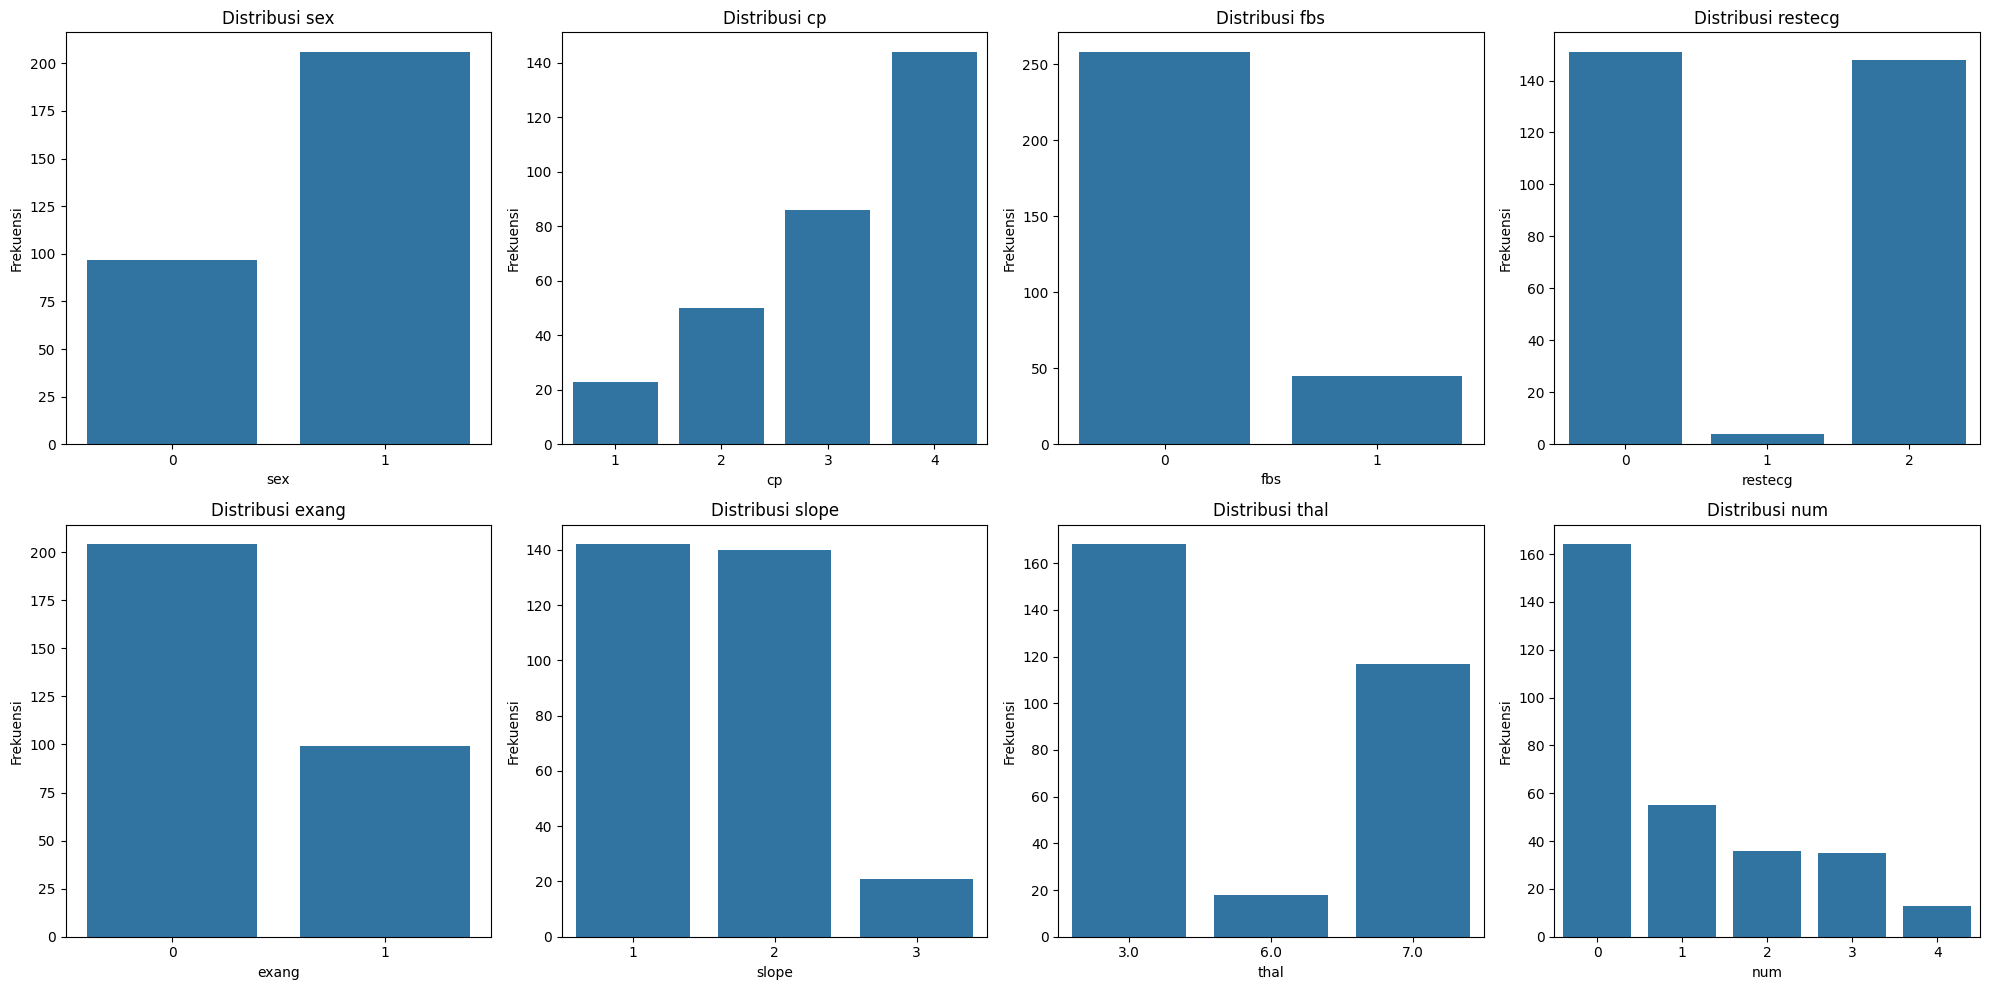

In [46]:
# Analisis distribusi data kategorikal

# Menentukan fitur kategorikal
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'num']

# Membuat gambar dan sumbu untuk subplot
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Meratakan sumbu x untuk visualisasi
axes = axes.flatten()

# Melakukan perulangan dan buat bar plot utk setiap fitur
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Distribusi {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frekuensi')

# Menampilkan plot
plt.tight_layout()
plt.show()


Berdasarkan hasil diatas dapat dijelaskan bahwa:

1. `sex` atau jenis kelamin mayoritas pasien adalah laki-laki, hal ini bisa menunjukkan bahwa laki-laki lebih sering didiagnosis atau memiliki risiko yang lebih tinggi penyakit jantung.

2. `cp` atau tipe nyeri data, sebagian besar pasien mengalami tipe nyeri dada dengan kode 4, hal ini mengidikasikan jenis nyeri dada yang serius dan menjadi indikator penting penyakit jantung.

3. `fbs` atau kadar gula darah puasa, dimana sebagian besar pasien memiliki kadar gula daraah puasa yang normal (kode 0) dan hanya sebagian kecil yg memiliki kadar gula darah tinggi (kode 1).

4. `restecg` atau hasil pemeriksaan EKG istirahat menunjukkan dua puncak utama pada kategori 0 dan 2, dengan sedikit pasien pada kategori 1. Hal ini menunjukkan bahwa kabanyakan pasien memiliki hasil EKG yang normal atau mengalami hipertrofi ventrikel kiri (pembesaran bilik sebelah kiri jantung) dan sedikit yang menunjukkan kelainan lainnya.

5. `exang` atau latihan terinduksi angina (nyeri dada), dimana lebih banyak pasien tidak mengalami angina yang dipicu oleh latihan (0) dibandingkan yang mengalami (1). Hal ini menunjukkan sebagian besar pasien tidak menunjukkan gejala angina selama latihan.

6. `slope` atau kemiringan segmen ST, sebagian besar pasien memiliki kemiringan segmen ST yang landai atau normal (1 dan 2), dan hanya sedikit yang memiliki kemiringan yang lebih tinggi (3). Hal ini menunjukkan bahwa banyak pasien memiliki respons jantung yang tidak terlalu abnormal terhadap stres atau latihan.

7. `thal` atau thalassemia (kelainan darah bawaan), sebagian besar pasien memiliki thallassemia dengan tipe 3.0 dan 7.0 dan hanya sedikit yang 6.0.

8. `num` atau tingkat keparahan penyakit jantung, sebagian besar pasien memiliki nilai 0 (tidak ada penyakit jantung), namun ada distribusi yang signifikan dari nilai 1-4 yang menunjukkan berbagai tingkat keparahan penyakit jantung

# **6. Analisis Bivariate**

Analisis bivariate adalah analisis statistik yang meneliti bagaimana dua variabel yang berbeda saling berhubungan

a. Korelasi antara `age` dan `trestbps`, dengan tujuan untuk melihat apakah usia berhubungan dengan tekanan darah istirahat

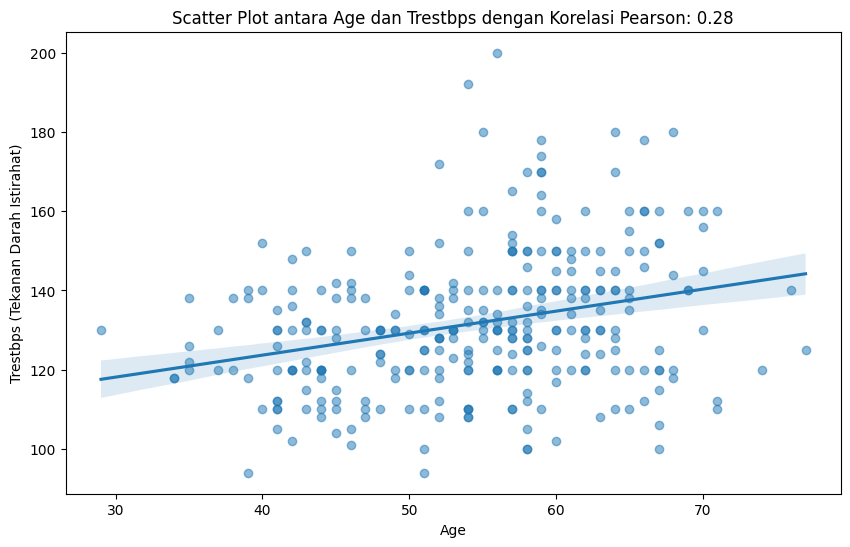


Nilai Korelasi Pearson antara Age dan Trestbps: 0.28494591931369034
Nilai p-value: 4.547476967620812e-07


In [47]:
# import fungsi pearsonr
from scipy.stats import pearsonr

# Menghitung korelasi Pearson antara variabel age dan trestbps
correlation, p_value = pearsonr(df['age'], df['trestbps'])

# Visualisasi scatter plot dengan garis regresi
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='trestbps', data=df, scatter_kws={'alpha':0.5})
plt.title(f'Scatter Plot antara Age dan Trestbps dengan Korelasi Pearson: {correlation:.2f}')
plt.xlabel('Age')
plt.ylabel('Trestbps (Tekanan Darah Istirahat)')
plt.show()

# Menampilkan nilai korelasi dan p-value
print()
print(f'Nilai Korelasi Pearson antara Age dan Trestbps: {correlation}')
print(f'Nilai p-value: {p_value}')


Berdasarkan hasil tersebut dapat dijelaskan bahwa ada korelasi positif yang lemah antara usia dan tekanan darah istirahat, dan secara statistik berkorelasi signifikan

b. Korelasi antara `chol` dan `trestbps`, dengan tujuan untuk memahami apakah kadar kolesterol berhubungan dengan tekanan darah

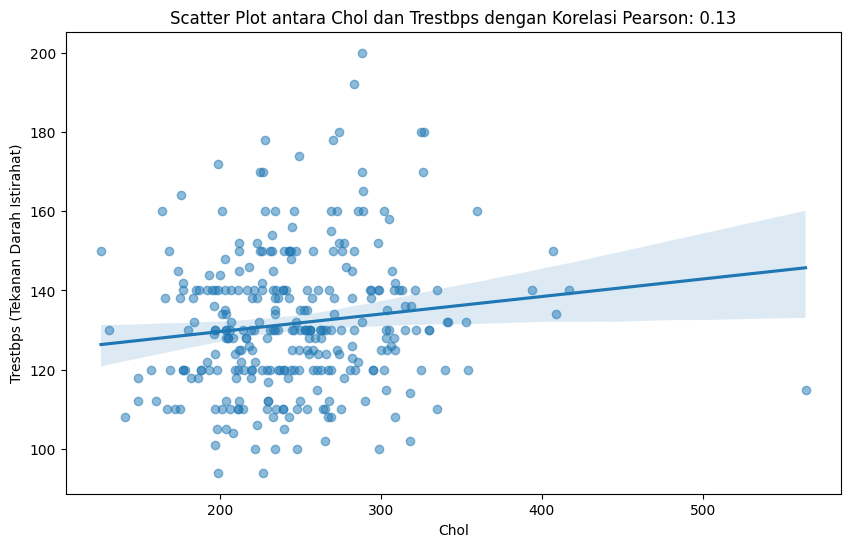


Nilai Korelasi Pearson antara Chol dan Trestbps: 0.1301201084926918
Nilai p-value: 0.023496472730037892


In [48]:
# Menghitung korelasi Pearson antara variabel chol dan trestbps
correlation, p_value = pearsonr(df['chol'], df['trestbps'])

# Visualisasi scatter plot dengan garis regresi
plt.figure(figsize=(10, 6))
sns.regplot(x='chol', y='trestbps', data=df, scatter_kws={'alpha':0.5})
plt.title(f'Scatter Plot antara Chol dan Trestbps dengan Korelasi Pearson: {correlation:.2f}')
plt.xlabel('Chol')
plt.ylabel('Trestbps (Tekanan Darah Istirahat)')
plt.show()

# Menampilkan nilai korelasi dan p-value
# Menampilkan nilai korelasi dan p-value
print()
print(f'Nilai Korelasi Pearson antara Chol dan Trestbps: {correlation}')
print(f'Nilai p-value: {p_value}')

Berdasarkan hasil tersebut dapat dijelaskan bahwa ada korelasi positif yang sangat lemah antara tingkat kolesterol dan tekanan darah istirahat, dan secara statistik berkorelasi signifikan.

c. Korelasi antara `age` dan `thalach`, dengan tujuan untuk melihat apakah usia berhubungan dengan detak jantung maksimum selama latihan

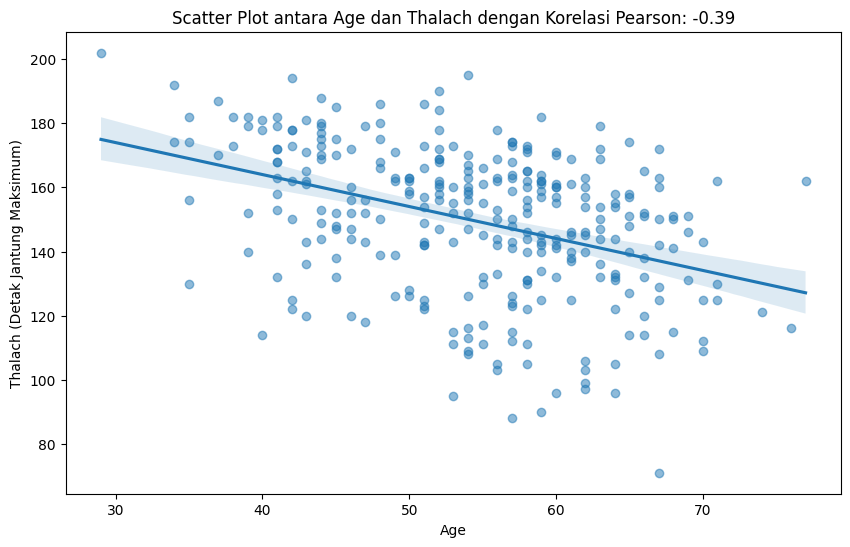


Nilai Korelasi Pearson antara Age dan Thalach: -0.3938058059868209
Nilai p-value: 1.1092756352878365e-12


In [49]:
# Menghitung korelasi Pearson antara variabel age dan thalach
correlation, p_value = pearsonr(df['age'], df['thalach'])

# Visualisasi scatter plot dengan garis regresi
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='thalach', data=df, scatter_kws={'alpha':0.5})
plt.title(f'Scatter Plot antara Age dan Thalach dengan Korelasi Pearson: {correlation:.2f}')
plt.xlabel('Age')
plt.ylabel('Thalach (Detak Jantung Maksimum)')
plt.show()

# Menampilkan nilai korelasi dan p-value
print()
print(f'Nilai Korelasi Pearson antara Age dan Thalach: {correlation}')
print(f'Nilai p-value: {p_value}')

Berdasarkan hasil diatas dapat dijelaskan ada korelasi negatif dan secara statistik signifikan. Sehingga dapat disimpulkan bahwa dengan bertambahnya usia detak jantung maksimum akan menjadi lebih rendah.

d. Perbandingan `chol` berdasarkan `sex` dengan tujuan untuk melihat apakah ada perbedaan signifikan kadar kolesterol antara laki-laki dan perempuan

T-test antara chol pada laki-laki dan perempuan: t-statistic = -3.539847931068439, p-value = 0.0004636612647813684



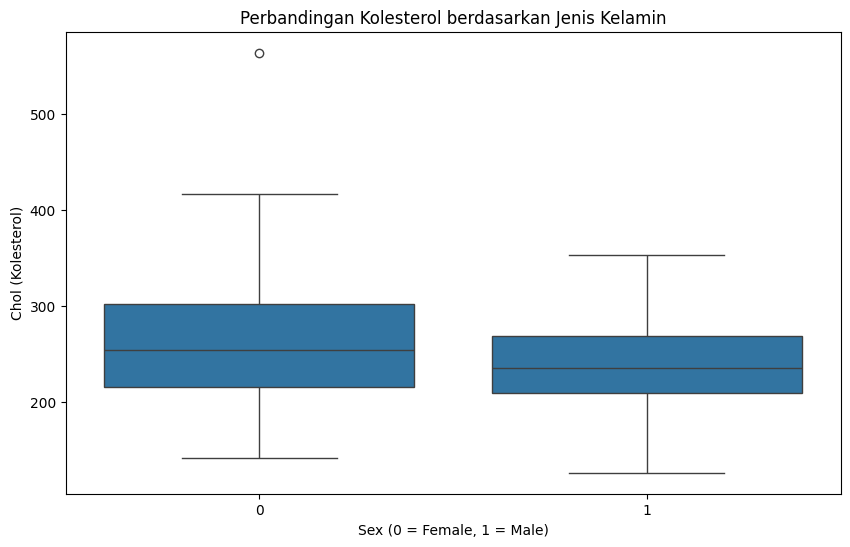

In [50]:
from scipy.stats import ttest_ind

# Memisahkan data berdasarkan jenis kelamin
chol_male = df[df['sex'] == 1]['chol']
chol_female = df[df['sex'] == 0]['chol']

# Uji T-test
t_stat, p_value = ttest_ind(chol_male, chol_female)
print(f"T-test antara chol pada laki-laki dan perempuan: t-statistic = {t_stat}, p-value = {p_value}")
print()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='chol', data=df)
plt.title('Perbandingan Kolesterol berdasarkan Jenis Kelamin')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Chol (Kolesterol)')
plt.show()

Berdasarkan hasil diatas dapat disimpulkan bahwa rata-rata kadar kolesterol pada perempuan lebih tinggi secara signifikan dibandingkan dengan laki-laki. Perempuan memiliki variasi kadar kolesterol yang lebih besar, ada kadar kolesterol yang sangat tinggi diatas batas maksimum dari tingkat kolesterol yang ada.

e. Perbandingan `thalach` berdasarkan `exang` dengan tujuan untuk memahami apakah detak jantung maksimum tergantung pada pasien mengalami angina selama latihan

T-test antara thalach pada pasien dengan dan tanpa angina terinduksi: t-statistic = 7.085881250789084, p-value = 9.839554893355423e-12



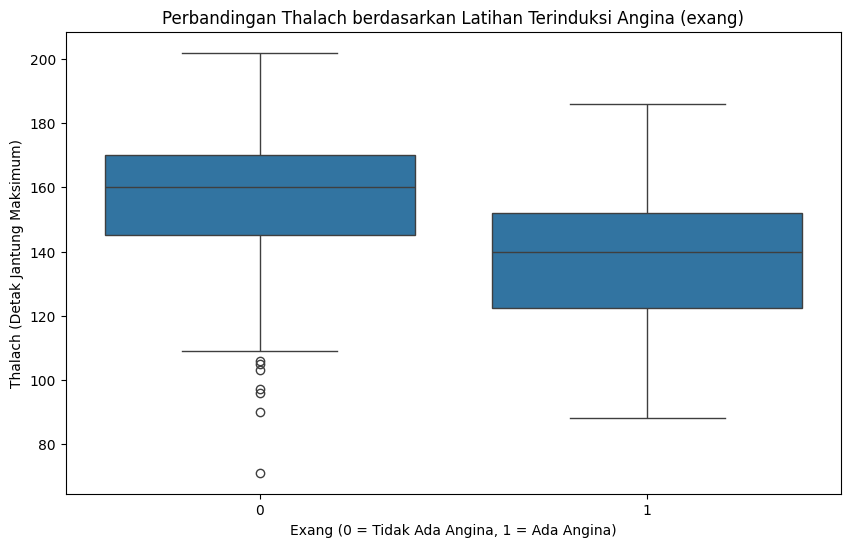

In [51]:
# Memisahkan data berdasarkan exang (0 = tidak ada angina, 1 = ada angina)
thalach_no_angina = df[df['exang'] == 0]['thalach']
thalach_with_angina = df[df['exang'] == 1]['thalach']

# Uji T-test
t_stat, p_value = ttest_ind(thalach_no_angina, thalach_with_angina)
print(f"T-test antara thalach pada pasien dengan dan tanpa angina terinduksi: t-statistic = {t_stat}, p-value = {p_value}")
print()

# Boxplot untuk visualisasi
plt.figure(figsize=(10, 6))
sns.boxplot(x='exang', y='thalach', data=df)
plt.title('Perbandingan Thalach berdasarkan Latihan Terinduksi Angina (exang)')
plt.xlabel('Exang (0 = Tidak Ada Angina, 1 = Ada Angina)')
plt.ylabel('Thalach (Detak Jantung Maksimum)')
plt.show()

Berdasarkan hasil diatas dapat disimpulkan bahwa pasien yang mengalami angina terinduksi selama latihan cenderung memiliki detak jantung maksimum yang lebih rendah. Hal ini mungkin disebabkan adanya keterbatasan kemampuan jantung untuk menanggapi stres atau latihan fisik yang diberikan, sehingga bisa menjadi indikator kondisi jantung yang lebih serius. Terdapat variasi yang lebih besar dalam `thalach` pada pasien tanpa angina dibandingkan dengan pasien yang memiliki angina.

f. Asosiasi antara `cp` (tipe nyeri dada) dan `num` (tingkat keparahan penyakit jantung), dengan tujuan untuk melihat apakah tipe nyeri dada berhubungan dengan tingkat keparahan penyakit jantung.

In [52]:
import scipy.stats as stats

# Membuat tabel kontingensi
contingency_table = pd.crosstab(df['cp'], df['num'])

# Uji Chi-square
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square Test antara cp dan num: chi2 = {chi2}, p-value = {p}")

# Menampilkan tabel kontingensi
print("\nTabel Kontingensi:")
print(contingency_table)


Chi-square Test antara cp dan num: chi2 = 88.97864877576103, p-value = 7.781947207487869e-14

Tabel Kontingensi:
num   0   1   2   3   4
cp                     
1    16   5   1   0   1
2    41   6   1   2   0
3    68   9   4   4   1
4    39  35  30  29  11


Berdasarkan hasil uji signifikan dan tabel kontingensi diatas dapat disimpulkan bahwa:

1. Ada hubungan yang signifikan antara `cp` (tipe nyeri dada) dan `num` (tingkat keparahan penyakit jantung). Jenis nyeri dada yang dialami pasien dapat menjadi indikator penting untuk melihat tingkat keparangan penyakit jantung.

2. Tipe nyeri dada yang lebih serius (cp=4) cenderung terkait dengan penyakit jantung yang lebih parah (num=3 dan num=4). Namun sebaliknya, tipe nyeri dada yang lebih ringan (cp=1) cenderung sedikit atau tidak adanya penyakit jantung.

g. Asosiasi antara `thal` dan `num` dengan tujuan untuk menguji apakah tipe thalassemia tertentu berhubungan dengan keparahan penyakit jantung.

In [53]:
# Membuat tabel kontingensi
contingency_table = pd.crosstab(df['thal'], df['num'])

# Uji Chi-square
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square Test antara thal dan num: chi2 = {chi2}, p-value = {p}")

# Menampilkan tabel kontingensi
print("\nTabel Kontingensi:")
print(contingency_table)

Chi-square Test antara thal dan num: chi2 = 97.00897633863997, p-value = 1.742165375516396e-17

Tabel Kontingensi:
num     0   1   2   3  4
thal                    
3.0   130  22   8   6  2
6.0     6   3   6   1  2
7.0    28  30  22  28  9


Berdasarkan hasil uji signifikan dan tabel kontingensi diatas dapat disimpulkan bahwa:

1. Ada hubungan yang sangat signifikan antara tipe `thal` (thalassemia) dan `num` (tingkat keparahan penyakit jantung). Jenis thalassemia yang dimiliki pasien dapat menjadi indikator penting dari tingkat keparahan penyakit jantung.

2. Pasein dengan tipe thalassemia 7.0 tampaknya lebih cenderung memiliki penyakit jantung yang lebih parah, sedangkan pasien dengan tipe 3.0 lebih sering tidak memiliki penyakit jantung atau penyakit jantung yang lebih ringan.

h. Distribusi `oldpeak` berdasarkan `cp` dengan tujuan untuk melihat bagaiman nilai depresi ST bervariasi di antara berbagai jenis nyeri dada.

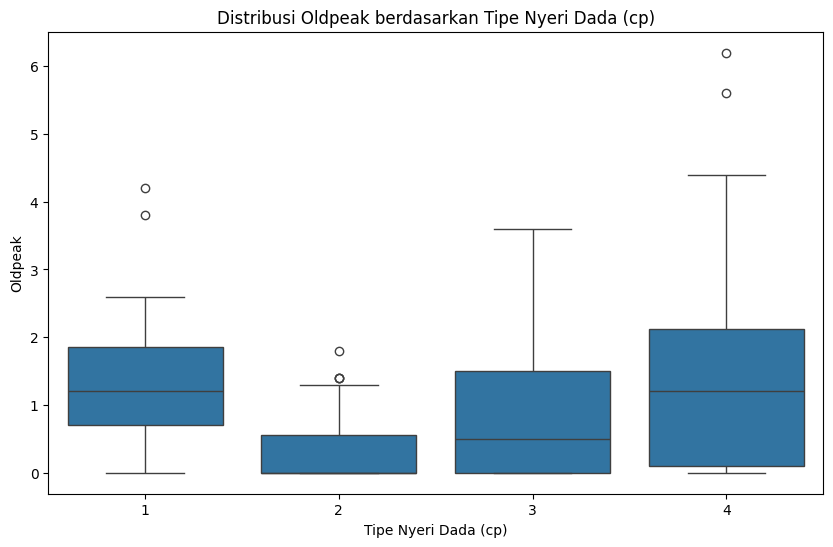

In [54]:
# Boxplot oldpeak berdasarkan cp
plt.figure(figsize=(10, 6))
sns.boxplot(x='cp', y='oldpeak', data=df)
plt.title('Distribusi Oldpeak berdasarkan Tipe Nyeri Dada (cp)')
plt.xlabel('Tipe Nyeri Dada (cp)')
plt.ylabel('Oldpeak')
plt.show()


Kesimpulan yang dapat diambil dari hasil diatas adalah:

1. Terdapat variasi yang jelas dalam distribusi `oldpeak` berdasarkan tipe nyeri dada. Tipe nyeri data cp=4 cenderung dikaitkan dengan nilai `oldpeak` yang tinggi, bahwa mengindikasikan adanya masalah jantung yang serius

2. Tipe nyeri data dapat menjadi indikator penting dalam menilai tingkat keparahan respons jantung terhadap stres atau latihan fisik, karena cenderung memiliki depresi ST yang lebih tinggi selama latihan.

i. Distribusi `trestbps` berdasarkan `num` dengan tujuan untuk memahami bagaimana tekanan darah istirahat bervariasi di antara berbagai tingkat keparahan penyakit jantung


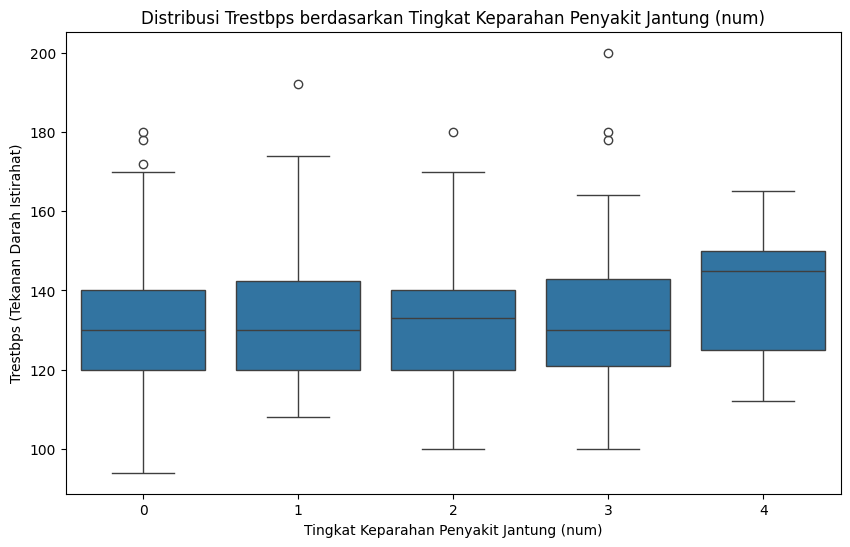

In [55]:
# Boxplot trestbps berdasarkan num
plt.figure(figsize=(10, 6))
sns.boxplot(x='num', y='trestbps', data=df)
plt.title('Distribusi Trestbps berdasarkan Tingkat Keparahan Penyakit Jantung (num)')
plt.xlabel('Tingkat Keparahan Penyakit Jantung (num)')
plt.ylabel('Trestbps (Tekanan Darah Istirahat)')
plt.show()


Berdasarkan hasil ini dapat disimpulkan bahwa:

1. Secara umum tekanan darah istirahat tidak menunjukkan variasi yang signifikan di seluruh tingkat keparahan penyakit jantung, walaupun ada sedikit peningkatan pada num=4.

2. Tekanan darah istirahat dalam data ini, tidak menjadi indikator utama untuk menilai tingkat keparahan penyakit jantung, karena tidak menunjukkan perbedaan yang signifikan dari yang memiliki penyakit jantung (num=0).

j. Hubungan `fbs` (gula darah puasa) dan `num`, dengan tujuan untuk melihat apakah ada hubungan antara gula darah yang tinggi dengan penyakit jantung.

<ipython-input-64-b483154162c1>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['fbs'].groupby(df['num']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'),


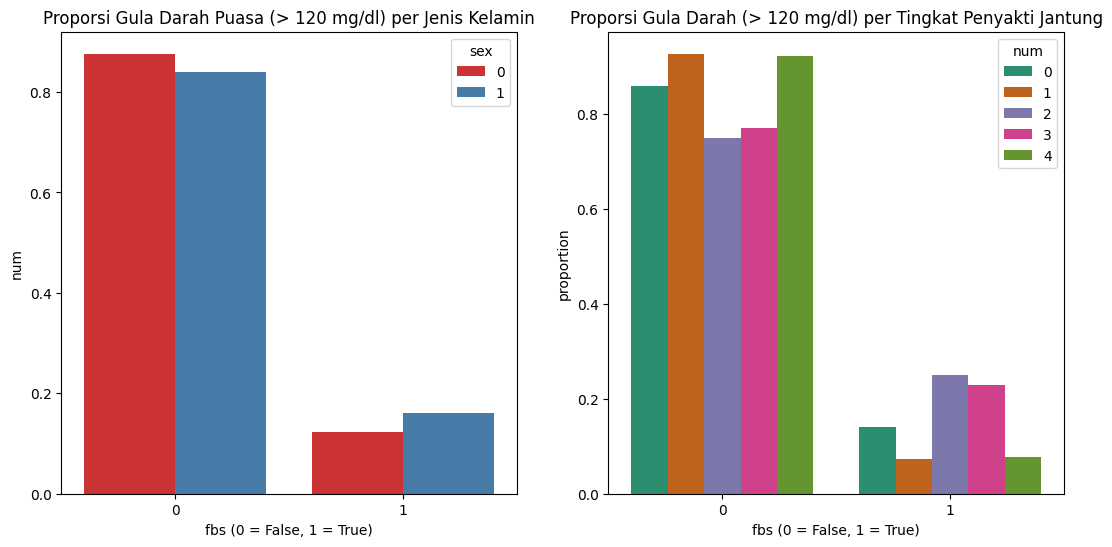

In [64]:
def risk_factors_fbs(data):
    """
    Plot bar chart dari Gula Darah Puasa (> 120 mg/dl) dibandingkan dengan jenis kelamin dan tingkat penyakit jantung
    """
    fig = plt.figure(figsize=(20, 6))

    # Gula darah puasa berdasarkan jenis kelamin
    plt.subplot(1, 3, 2)
    df['fbs'].groupby(df['sex']).value_counts(normalize=True).rename('num').reset_index().pipe((sns.barplot, 'data'),
                                                                                               x='fbs', y='num', hue='sex', palette='Set1')
    plt.title('Proporsi Gula Darah Puasa (> 120 mg/dl) per Jenis Kelamin')
    plt.xlabel('fbs (0 = False, 1 = True)')


    # Gula darah puasa untuk penyakit jantung
    plt.subplot(1, 3, 3)
    df['fbs'].groupby(df['num']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'),
                                                                                                      x='fbs', y='proportion', hue='num', palette='Dark2')
    plt.title('Proporsi Gula Darah (> 120 mg/dl) per Tingkat Penyakti Jantung')
    plt.xlabel('fbs (0 = False, 1 = True)')
    plt.show()


risk_factors_fbs(df)

Berdasarkan hasil diatas dapat disimpulkan bahwa:

1. Laki-laki tampaknya lebih cenderung memiliki gula darah puasa yang lebih tinggi dibandingkan perempuan. Sebagian besar dari kedua kelompok jenis kelamin ini memiliki kadar gula darah yang normal

2. Pasien dengan gula darah puasa yang tinggi lebih cenderung memiliki penyakit jantung yang lebih parah (num=3 dan num=4), hal ini mengidentifikasikan bahwa gula darah puasa yang tinggi menjadi faktor risiko yang relevan untuk penyakit jantung yang parah,

k. Hubungan distrbusi antara `age` dan `num`, dengan tujuan untuk melihat kontribusi umur dalam tingkat penyakit jantung.

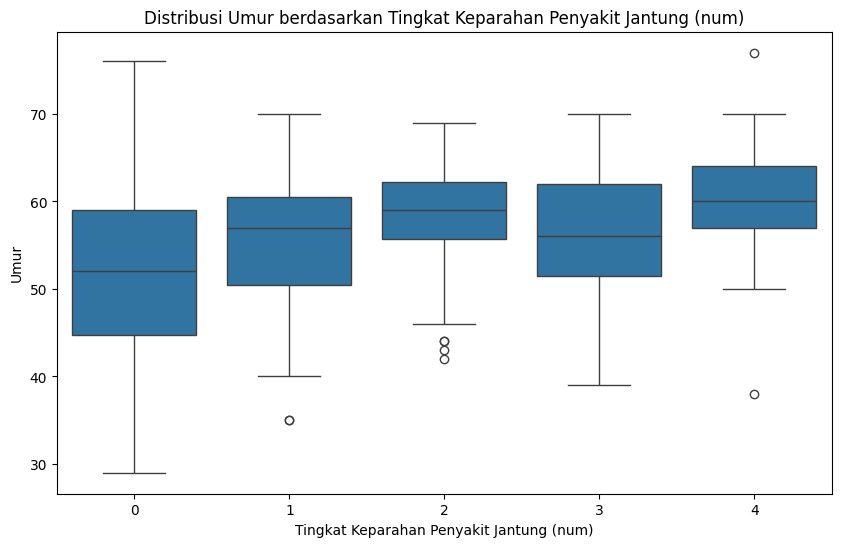

In [57]:
# Boxplot umur berdasarkan num
plt.figure(figsize=(10, 6))
sns.boxplot(x='num', y='age', data=df)
plt.title('Distribusi Umur berdasarkan Tingkat Keparahan Penyakit Jantung (num)')
plt.xlabel('Tingkat Keparahan Penyakit Jantung (num)')
plt.ylabel('Umur')
plt.show()




Berdasarkan hasil ini dapat disimpulkan bahwa:

1. Secara umum, pasien dengan penyakit jantung yang lebih parah (num=3 dan num=4) cenderung memiliki usia yang lebih tinggi.

2. Umur dapat menjadi faktor risiko yang relevan untuk penyakit jantung yang parah, karena pasien yang lebih tua lebih mungkin mengalami penyakit jantung yang lebih serius.

k. Korelasi antar variabel dalam data penyakit jantung

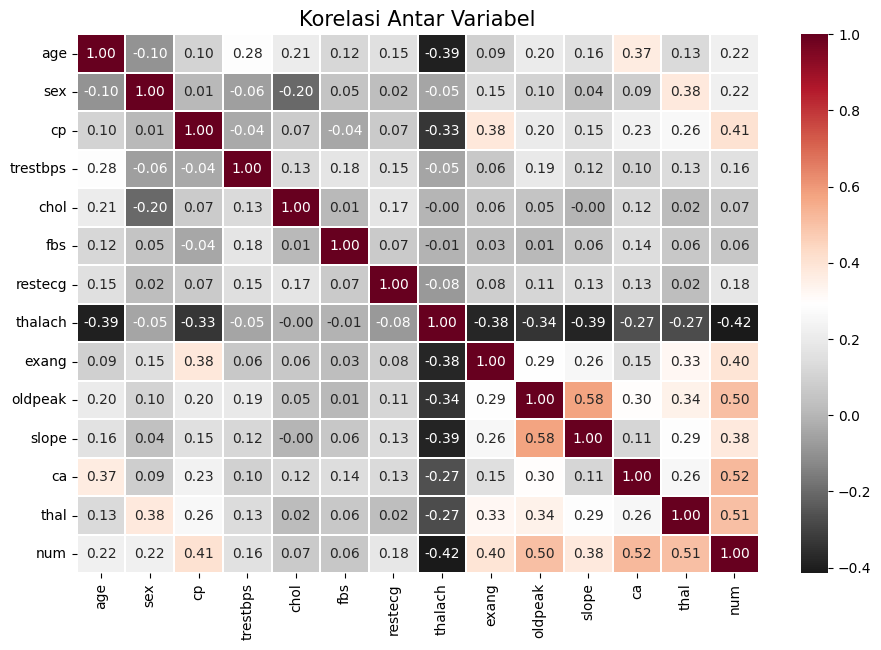

In [58]:
def correlation_heatmap(data):
    """
    Koliasi antar variabel dalam data
    """
    plt.figure(figsize=(11, 7))
    sns.heatmap(data.corr(), annot=True, linewidth=0.2,
                fmt='.2f', cmap='RdGy_r')
    plt.title('Korelasi Antar Variabel', fontsize=15)
    plt.show()


correlation_heatmap(df);

Berdasarkan hasil korelasi dari tabel diatas, dapat disimpulkan bahwa variabel `thalach`, `oldpeak`, `ca` ada hubungan yang kuat dengan `num`. Mengindikasikan bahwa variabel-variabel tersebut mempengaruhi tingkat penyakit jantung

# **7. Analisis Bivariate Lainnya**

Dalam analisis bivariate berikut ini akan melakukan analisis regresi logistik multinomial untuk variabel `num` yang memiliki lebih dari 2 kategori. Variabel prediktor yang digunakan mengacu pada hasil korelasi pada poin f sebelumnya

a. Analisis regresi logistik variabel `thalach` terhadap `num` dengan tujuan untuk melihat pengaruh detak jantung maksimum terhadap tingkat penyakit jantung.

In [59]:
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Pastikan variabel num bertipe kategorikal
df['num'] = df['num'].astype('category')

# Menyiapkan variabel independen dan dependen
X = df[['thalach']]  # variabel prediktor (detak jantung maksimum)
y = df['num']   # variabel target (tingkat keparahan penyakit jantung)

# Menambahkan konstanta ke dalam model
X = sm.add_constant(X)

# Model regresi logistik multinomial
model = sm.MNLogit(y, X)
result = model.fit()

# Ringkasan hasil
print(result.summary())

Optimization terminated successfully.
         Current function value: 1.170131
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:                    num   No. Observations:                  303
Model:                        MNLogit   Df Residuals:                      295
Method:                           MLE   Df Model:                            4
Date:                Thu, 19 Sep 2024   Pseudo R-squ.:                 0.08549
Time:                        01:57:27   Log-Likelihood:                -354.55
converged:                       True   LL-Null:                       -387.69
Covariance Type:            nonrobust   LLR p-value:                 1.380e-13
     num=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6308      1.203      3.018      0.003       1.273       5.988
thalach       -0.0310      0.

Berdasarkan tabel hasil diatas, dapat dijelaskan bahwa:

1. Dari nilai Pseudo R-squared = 0.08549. nilai ini menunjukkan bahwa sekitar 8.5% variasi dalam variabel target (`num`) yang dapat dijelaskan oleh variabel prediktor (`thalach`).

2. Hubungan antara dua variabel dalam semua kategori num = 1-4 memiliki nilai koefisien yang negatif. Hal ini mengindikasikan bahwa semakin tinggi detak jantung maksimum, semakin kecil kemungkinan pasen berada pada kategori penyakit jantung yang lebih parah. Sehingga dapa disimpulkan bahwa detak jantung maksimum yang lebih rendah yang terkait dengan penyakit jantung yang lebih serius.

b. Analisis regresi logistik variabel `oldpeak` terhadap `num` dengan tujuan untuk melihat pengaruh depresi ST terhadap tingkat penyakit jantung.

In [60]:
# Menyiapkan variabel independen dan dependen
X = df[['oldpeak']]  # variabel prediktor (depresi ST)
y = df['num']   # variabel target (tingkat keparahan penyakit jantung)

# Menambahkan konstanta ke dalam model
X = sm.add_constant(X)

# Model regresi logistik multinomial
model = sm.MNLogit(y, X)
result = model.fit()

# Ringkasan hasil
print(result.summary())

Optimization terminated successfully.
         Current function value: 1.144363
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:                    num   No. Observations:                  303
Model:                        MNLogit   Df Residuals:                      295
Method:                           MLE   Df Model:                            4
Date:                Thu, 19 Sep 2024   Pseudo R-squ.:                  0.1056
Time:                        01:57:27   Log-Likelihood:                -346.74
converged:                       True   LL-Null:                       -387.69
Covariance Type:            nonrobust   LLR p-value:                 6.896e-17
     num=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5070      0.216     -6.967      0.000      -1.931      -1.083
oldpeak        0.5336      0.

Berdasarkan tabel hasil diatas, maka dapat dijelaskan bahwa:

1. Nilai Pseuda R-squared = 0,1056: sekitar 10,56% variasi dalam variabel target `num` dijelaskan oleh variabel `oldpeak`.

2. Hubungan positif antara `oldpeak` dan `num` (tingkat penyakit jantung) untuk semua kategori dan signifikan, hal ini menunjukkan bahwa semakin tinggi nilai `oldpeak` (semakin besar depresi ST selama olah raga), maka semakin besar kemungkinan pasien mengalami penyakit jantung yg lebih parah.

3. Hubungan antara `oldpeak` dan tingkat penyakit jantung semakin kuat untuk kategori num=2, num=3 dan num=4 dengan nilai koefisien yang lebih besar.

c. Analisis regresi logistik variabel `ca` terhadap `num` dengan tujuan untuk melihat pengaruh Jumlah pembuluh darah besar yang diwarnai terhadap tingkat penyakit jantung.

In [61]:
# Menyiapkan variabel independen dan dependen
X = df[['ca']]  # variabel prediktor (jumlah pembuluh darah besar yang diwarnai)
y = df['num']   # variabel target (tingkat keparahan penyakit jantung)

# Menambahkan konstanta ke dalam model
X = sm.add_constant(X)

# Model regresi logistik multinomial
model = sm.MNLogit(y, X)
result = model.fit()

# Ringkasan hasil
print(result.summary())

Optimization terminated successfully.
         Current function value: 1.136377
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:                    num   No. Observations:                  303
Model:                        MNLogit   Df Residuals:                      295
Method:                           MLE   Df Model:                            4
Date:                Thu, 19 Sep 2024   Pseudo R-squ.:                  0.1119
Time:                        01:57:28   Log-Likelihood:                -344.32
converged:                       True   LL-Null:                       -387.69
Covariance Type:            nonrobust   LLR p-value:                 6.488e-18
     num=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4894      0.195     -7.625      0.000      -1.872      -1.107
ca             0.8596      0.

Berdasarkan hasil tabel diatas, maka dapat dijelaskan bahwa:

1. Nilai Pseudo R-squared = 0,1119: sekitar 11,19% variasi dalam variabel target `num` dapat dijelaskan oleh variabel `ca`.

2. Hubungan positif antara `ca` dan tingkat penyakit jantung semakin untuk kategori num=2, num=3 dan num=4 dengan nilai koefisien yang lebih besar

3. Jumlah pembuluh darah besar yang diwarnai (`ca`) merupakan indikator yang signifikan untuk menilai tingkat keparahan penyakit jantung. Pasien dengan lebih banyak pembuluh darah yang diwarnai dimungkinkan pasien tersebut berada pada kategori penyakit jantung yang lebih serius.

# **8. Kesimpulan**

1. **Detak jantung maksimum (`thalach`) menurun seiringnya bertambahnya usia.** Terdapat korelasi negatif yang signifikan antara `age` dan `thalach` dengan nilai r= -0,39. Hal ini menunjukkan bahwa detak jantung maksimum yang dicapai selama tes stres atau latihan cenderung menurun seiring bertambahnya usia. Hal ini sejalan dengan penurunan kemampuan kardiovaskular alami yang terjadi pada populasi pasien yang lebih tua.

2. **Depresi ST (`oldpeak`) berhubungan positif dengan keparahan penyakit jantung**. Hasil analisi regresi logistik menunjukkan bahwa `oldpeak` (depresi ST yang diinduksi oleh latihan) berhubungan positif dan signifkan dengan tingkat keparahan penyakit jantung (`num`). Pasien dengan nilai `oldpeak` yang lebih tinggi lebih cenderung memiliki penyakit jantung lebih parah, dengan nilai koefisien yang meningkat disemua kategori.

3. **Jumlah pembuluh darah besar yang diwarnai (`ca`) merupakan prediktor signifikan yang mempengaruhi tingkat keparahan penyakit jantung**. Jumlah pembuluh darah besar yang diwarnai menunjukkan hubungan positif dan signifikan dengan tingkat keparahan penyakit jantung. Pasien dengan lebih banyak pembuluh darah yang diwarnai lebih cenderung memiliki penyakit jantung yang lebih parah (kategori num=2, num=3, dan num-4).

4. **Perbedaan gula darah puasa berdasarkan jenis kelamin dan tingkat keparahan penyakit jantung**. Sebagian besar pasien dengan kadar gula darah puasa tinggi (fbs > 120 mg/dL) adalah laki-laki, dan memiliki gula darah tinggi dan ditemukan pada pasien dengan panyakit jantung yang lebih parah (num=3 dan num=4). Hal ini mengindikasikan bahwa laki-laki dengan kadar gula darah yang lebih tinggi memiliki kemungkinan tingkat penyakit jantung yang lebih parah.

5. **Tipe nyeri data (`cp`) terkait dengan tingkat keparahan penyakit jantung**. Hasil analisis asosiasi menunjukkan bahwa tipe nyeri dada berhubungan dengan tingkat keparahan penyakit jantung, dimana tipe nyeri data yang lebih serius (cp=4) mengindikasikan penyakit jantung yang lebih parah.